In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/t19_23_cleaned.csv')
data.rename(columns={'County, State': 'County'}, inplace=True)


What counties have the highest (average) food insecurity rates? 

In [84]:
data['Overall Food Insecurity Rate (%)'] = data['Overall Food Insecurity Rate'] * 100
avg_insecurity = data.groupby('County')['Overall Food Insecurity Rate (%)'].mean().reset_index()

top_avg = avg_insecurity.sort_values(by='Overall Food Insecurity Rate (%)', ascending=False)
top_avg_list = top_avg['County'].head(10).tolist()

top_avg['Formatted'] = top_avg.apply(
    lambda row: f"{row['County']}: {row['Overall Food Insecurity Rate (%)']:.2f}%", axis=1)
print("Top 10 counties by average food insecurity rate (2019–2023):")
for i, val in enumerate(top_avg['Formatted'].head(10), 1):
    print(f"{i}. {val}")


Top 10 counties by average food insecurity rate (2019–2023):
1. Presidio: 26.78%
2. Dimmit: 25.52%
3. Starr: 24.70%
4. Brooks: 24.48%
5. Zavala: 23.96%
6. Zapata: 23.48%
7. San Augustine: 22.44%
8. Real: 22.02%
9. Jim Hogg: 21.28%
10. Cottle: 21.18%


What counties have high food insecurity rates among minorities? (black and hispanic people)?

In [90]:
black_cleaned = data[['County','Food Insecurity Rate among Black Persons (all ethnicities)']].dropna()
#nearly half the rows had missing values

black_cleaned['Food Insecurity Rate among Black Persons (all ethnicities) (%)'] = black_cleaned['Food Insecurity Rate among Black Persons (all ethnicities)']*100
black_cleaned.sort_values(by='Food Insecurity Rate among Black Persons (all ethnicities) (%)', ascending=False, inplace=True)

black_cleaned['Formatted'] = black_cleaned.apply(
    lambda row: f"{row['County']}: {row['Food Insecurity Rate among Black Persons (all ethnicities) (%)']:.2f}%", axis=1
)
print('Counties with the highest food insecurity rates among black people:')
for i, val in enumerate(black_cleaned['Formatted'].head(10),1):
    print(f"{i}. {val}")

Counties with the highest food insecurity rates among black people:
1. Ward: 56.00%
2. Fannin: 46.00%
3. Ward: 46.00%
4. Matagorda: 45.00%
5. Kleberg: 45.00%
6. Jasper: 44.00%
7. Fannin: 44.00%
8. Newton: 44.00%
9. Tyler: 43.00%
10. Matagorda: 43.00%


In [91]:
hispanic_cleaned = data[['County','Food Insecurity Rate among Hispanic Persons (any race)']].dropna()
#nearly half the rows had missing values

hispanic_cleaned['Food Insecurity Rate among Hispanic Persons (any race) (%)'] = hispanic_cleaned['Food Insecurity Rate among Hispanic Persons (any race)']*100
hispanic_cleaned.sort_values(by='Food Insecurity Rate among Hispanic Persons (any race) (%)', ascending=False, inplace=True)

hispanic_cleaned['Formatted'] = hispanic_cleaned.apply(
    lambda row: f"{row['County']}: {row['Food Insecurity Rate among Hispanic Persons (any race) (%)']:.2f}%", axis=1
)

print('Counties with the highest food insecurity rates among hispanic people:')
for i, val in enumerate(hispanic_cleaned['Formatted'].head(10),1):
    print(f"{i}. {val}")

Counties with the highest food insecurity rates among hispanic people:
1. Newton: 53.00%
2. Menard: 41.00%
3. Menard: 40.00%
4. Presidio: 40.00%
5. Dimmit: 37.00%
6. San Augustine: 37.00%
7. Newton: 36.00%
8. San Augustine: 36.00%
9. Presidio: 35.00%
10. Duval: 34.00%


What counties have highest % FI > SNAP Threshold (percent of food insecure people over the SNAP income threshold)? 


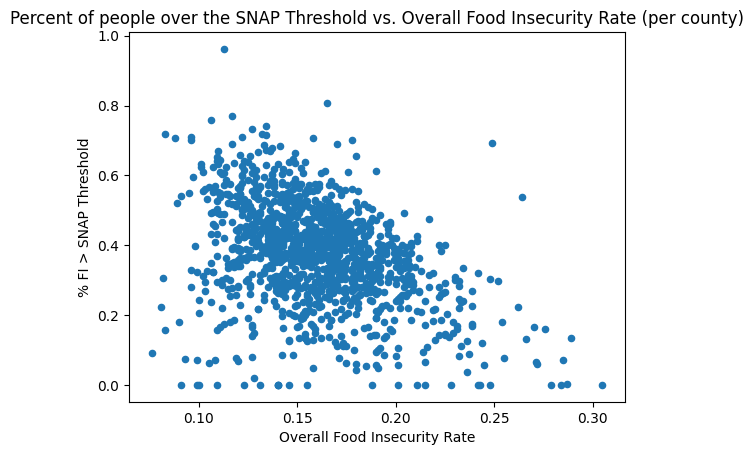

,County,Overall Food Insecurity Rate,% FI > SNAP Threshold,SNAP Gap Index
1166,Loving,0.249,0.692,0.1723
1146,Kenedy,0.264,0.538,0.1420
912,Loving,0.165,0.806,0.1330
150,Loving,0.178,0.700,0.1246
1063,Concho,0.180,0.654,0.1177
...,...,...,...,...
404,Loving,0.243,0.000,0.0000
892,Kenedy,0.201,0.000,0.0000
68,Edwards,0.131,0.000,0.0000
585,Foard,0.146,0.000,0.0000


In [ ]:
graph = data[['County', 'Overall Food Insecurity Rate', '% FI > SNAP Threshold']].copy()
graph.plot(kind='scatter', x='Overall Food Insecurity Rate', y='% FI > SNAP Threshold')
plt.title('Percent of people over the SNAP Threshold vs. Overall Food Insecurity Rate (per county)')
plt.show()

# graph['Ratio'] = (graph['% FI > SNAP Threshold']/graph['Overall Food Insecurity Rate']).round(2)
# graph.sort_values(by='Ratio', ascending=False)
graph['SNAP Gap Index'] = (
    graph['% FI > SNAP Threshold'] * graph['Overall Food Insecurity Rate']
).round(4)
graph.sort_values(ascending=False, by='SNAP Gap Index')

In [120]:
from scipy.stats import zscore

graph['z_FI'] = zscore(graph['Overall Food Insecurity Rate'])
graph['z_SNAP'] = zscore(graph['% FI > SNAP Threshold'])

graph['Outlier Score'] = (graph['z_FI'] + graph['z_SNAP']) / 2

print(graph.sort_values(by='Outlier Score', ascending=False).head(5))

print('''Our results indicate that Loving and Kenedy counties had Z-scores over two,
      thus indicating that these two counties have high levels of both food insecurity and 
      a high percent of individuals over the SNAP Threshold.''')

      County  Overall Food Insecurity Rate  % FI > SNAP Threshold  \
1166  Loving                         0.249                  0.692   
1146  Kenedy                         0.264                  0.538   
912   Loving                         0.165                  0.806   
150   Loving                         0.178                  0.700   
658   Loving                         0.113                  0.962   

      SNAP Gap Index      z_FI    z_SNAP  Outlier Score  
1166          0.1723  2.690906  2.231094       2.461000  
1146          0.1420  3.144851  1.155119       2.149985  
912           0.1330  0.148813  3.027595       1.588204  
150           0.1246  0.542232  2.286989       1.414610  
658           0.1087 -1.424864  4.117544       1.346340  
Our results indicate that Loving and Kenedy counties had Z-scores over two,
      thus indicating that these two counties have high levels of both food insecurity and 
      a high percent of individuals over the SNAP Threshold.
